# 1. Customary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Object Creation

## Series
Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([2, 4, 8, np.nan, np.nan, 128]) # creating the series
s

0      2.0
1      4.0
2      8.0
3      NaN
4      NaN
5    128.0
dtype: float64

## Dataframes
### Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=7)  # creating the datetime index
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
data_array=np.random.randn(7, 4) # creating the NumPy array
data_array

array([[-0.5924562 , -0.65508898,  0.1059285 ,  0.37273911],
       [-0.04351527,  0.40784037, -2.01309938, -1.56204469],
       [-2.76784531,  0.29164692,  0.05122387, -0.59808969],
       [-1.03292079, -0.77089465, -0.80090532, -0.80570366],
       [-0.72916219,  0.08053233, -0.95779839, -0.47510108],
       [ 0.22164472,  0.97379929, -0.23258816, -0.36089572],
       [-0.2663544 ,  0.91658942,  0.47599481,  0.94984199]])

In [5]:
df = pd.DataFrame(data_array, index=dates, columns=list('ABCD'))# creating the dataframe
df

,A,B,C,D
2013-01-01,-0.592456,-0.655089,0.105929,0.372739
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-06,0.221645,0.973799,-0.232588,-0.360896
2013-01-07,-0.266354,0.916589,0.475995,0.949842


In [6]:
# creating the index, array and datagrame at a go
df2 = pd.DataFrame(np.random.randn(7, 4), index=pd.date_range('20130101', periods=7), columns=list('ABCD')) 
df2

,A,B,C,D
2013-01-01,-0.155263,0.409751,-1.368038,-0.767434
2013-01-02,-0.562693,0.821890,-0.182355,1.216161
2013-01-03,-0.766685,-0.209633,0.147828,-1.515761
2013-01-04,0.755097,1.313465,0.540576,0.932127
2013-01-05,-0.796927,1.599193,-1.319283,-1.297280
2013-01-06,-0.853936,-0.017416,0.111491,-1.025783
2013-01-07,0.753591,0.418976,1.222148,-1.231838


### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [7]:
df3 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df3

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df3.dtypes # checking data types 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 3. Viewing Data

### Viewing the top of the dataframe

In [9]:
df.head()

,A,B,C,D
2013-01-01,-0.592456,-0.655089,0.105929,0.372739
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101


### Viewing the bottom of the dataframe

In [10]:
df.tail()

,A,B,C,D
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-06,0.221645,0.973799,-0.232588,-0.360896
2013-01-07,-0.266354,0.916589,0.475995,0.949842


### Viewing the index and columns

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### To get a quick statistical summary

In [13]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.744373,0.177775,-0.481606,-0.354179
std,0.987750,0.689020,0.844817,0.813004
min,-2.767845,-0.770895,-2.013099,-1.562045
25%,-0.881041,-0.287278,-0.879352,-0.701897
50%,-0.592456,0.291647,-0.232588,-0.475101
75%,-0.154935,0.662215,0.078576,0.005922
max,0.221645,0.973799,0.475995,0.949842


### Transposing data

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07
A,-0.592456,-0.043515,-2.767845,-1.032921,-0.729162,0.221645,-0.266354
B,-0.655089,0.407840,0.291647,-0.770895,0.080532,0.973799,0.916589
C,0.105929,-2.013099,0.051224,-0.800905,-0.957798,-0.232588,0.475995
D,0.372739,-1.562045,-0.598090,-0.805704,-0.475101,-0.360896,0.949842


### Sorting by axis

In [15]:
df.sort_index()

,A,B,C,D
2013-01-01,-0.592456,-0.655089,0.105929,0.372739
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-06,0.221645,0.973799,-0.232588,-0.360896
2013-01-07,-0.266354,0.916589,0.475995,0.949842


In [16]:
df.sort_index(axis=1, ascending=False)  # sorts the columns (by label) in descending order

,D,C,B,A
2013-01-01,0.372739,0.105929,-0.655089,-0.592456
2013-01-02,-1.562045,-2.013099,0.407840,-0.043515
2013-01-03,-0.598090,0.051224,0.291647,-2.767845
2013-01-04,-0.805704,-0.800905,-0.770895,-1.032921
2013-01-05,-0.475101,-0.957798,0.080532,-0.729162
2013-01-06,-0.360896,-0.232588,0.973799,0.221645
2013-01-07,0.949842,0.475995,0.916589,-0.266354


In [17]:
df.sort_index(axis=0, ascending=False) # sorts the rows (by index) in descending order

,A,B,C,D
2013-01-07,-0.266354,0.916589,0.475995,0.949842
2013-01-06,0.221645,0.973799,-0.232588,-0.360896
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-01,-0.592456,-0.655089,0.105929,0.372739


### Sorting by values

In [18]:
df.sort_values(by='B') # sorting rows in ascending order by values in colums B

,A,B,C,D
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-01,-0.592456,-0.655089,0.105929,0.372739
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-07,-0.266354,0.916589,0.475995,0.949842
2013-01-06,0.221645,0.973799,-0.232588,-0.360896


In [19]:
df.sort_values(by='C', ascending=False)  # sorting rows in descending order by values in colums C

,A,B,C,D
2013-01-07,-0.266354,0.916589,0.475995,0.949842
2013-01-01,-0.592456,-0.655089,0.105929,0.372739
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-06,0.221645,0.973799,-0.232588,-0.360896
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045


# 4. Selection

### Selecting a single column, which yields a Series

In [20]:
df.A

2013-01-01   -0.592456
2013-01-02   -0.043515
2013-01-03   -2.767845
2013-01-04   -1.032921
2013-01-05   -0.729162
2013-01-06    0.221645
2013-01-07   -0.266354
Freq: D, Name: A, dtype: float64

In [21]:
df['A']

2013-01-01   -0.592456
2013-01-02   -0.043515
2013-01-03   -2.767845
2013-01-04   -1.032921
2013-01-05   -0.729162
2013-01-06    0.221645
2013-01-07   -0.266354
Freq: D, Name: A, dtype: float64

### Selecting slices of rows

In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704


## Selection by label

In [23]:
df.loc[dates[0]] # selecting the first row 

A   -0.592456
B   -0.655089
C    0.105929
D    0.372739
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:, ['A', 'B']] # selecting values for columns 'A' and 'B'

,A,B
2013-01-01,-0.592456,-0.655089
2013-01-02,-0.043515,0.407840
2013-01-03,-2.767845,0.291647
2013-01-04,-1.032921,-0.770895
2013-01-05,-0.729162,0.080532
2013-01-06,0.221645,0.973799
2013-01-07,-0.266354,0.916589


In [25]:
df.loc['20130102':'20130104', ['C', 'D']] # multi-axis label selection

,C,D
2013-01-02,-2.013099,-1.562045
2013-01-03,0.051224,-0.598090
2013-01-04,-0.800905,-0.805704


### Reduction in dimension of the returned object

In [26]:
df.loc['20130102', ['A', 'B']]

A   -0.043515
B    0.407840
Name: 2013-01-02 00:00:00, dtype: float64

### Getting fast access to a scalar value

In [27]:
 df.at[dates[0], 'A'] # label based

-0.5924561974409919

In [28]:
df.iat[0, 0] # position based

-0.5924561974409919

## Selection by position

In [29]:
df.iloc[4]

A   -0.729162
B    0.080532
C   -0.957798
D   -0.475101
Name: 2013-01-05 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 2:4]

,C,D
2013-01-04,-0.800905,-0.805704
2013-01-05,-0.957798,-0.475101


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.043515,-2.013099
2013-01-03,-2.767845,0.051224
2013-01-05,-0.729162,-0.957798


## Boolean indexing

In [32]:
df[df['B'] > 0] # selecting rows for which values of in column 'A' are > 0

,A,B,C,D
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045
2013-01-03,-2.767845,0.291647,0.051224,-0.598090
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101
2013-01-06,0.221645,0.973799,-0.232588,-0.360896
2013-01-07,-0.266354,0.916589,0.475995,0.949842


In [33]:
df[df > 0] # selecting only values in the dataframe where a Boolean condition is met

,A,B,C,D
2013-01-01,NaN,NaN,0.105929,0.372739
2013-01-02,NaN,0.407840,NaN,NaN
2013-01-03,NaN,0.291647,0.051224,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.080532,NaN,NaN
2013-01-06,0.221645,0.973799,NaN,NaN
2013-01-07,NaN,0.916589,0.475995,0.949842


### Using the `isin()` method for filtering

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','seven']
df2

,A,B,C,D,E
2013-01-01,-0.592456,-0.655089,0.105929,0.372739,one
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045,one
2013-01-03,-2.767845,0.291647,0.051224,-0.598090,two
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704,three
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101,four
2013-01-06,0.221645,0.973799,-0.232588,-0.360896,three
2013-01-07,-0.266354,0.916589,0.475995,0.949842,seven


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-2.767845,0.291647,0.051224,-0.598090,two
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101,four


# 5. Setting

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6,7], index=pd.date_range('20130102', periods=7))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
2013-01-08    7
Freq: D, dtype: int64

In [37]:
df['F'] = s1 # setting s1 as column 'F' in the dataframe
df

,A,B,C,D,F
2013-01-01,-0.592456,-0.655089,0.105929,0.372739,NaN
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045,1.0
2013-01-03,-2.767845,0.291647,0.051224,-0.598090,2.0
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704,3.0
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101,4.0
2013-01-06,0.221645,0.973799,-0.232588,-0.360896,5.0
2013-01-07,-0.266354,0.916589,0.475995,0.949842,6.0


### Setting values by label

In [38]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.655089,0.105929,0.372739,NaN
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045,1.0
2013-01-03,-2.767845,0.291647,0.051224,-0.598090,2.0
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704,3.0
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101,4.0
2013-01-06,0.221645,0.973799,-0.232588,-0.360896,5.0
2013-01-07,-0.266354,0.916589,0.475995,0.949842,6.0


### Setting values by position

In [39]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105929,0.372739,NaN
2013-01-02,-0.043515,0.407840,-2.013099,-1.562045,1.0
2013-01-03,-2.767845,0.291647,0.051224,-0.598090,2.0
2013-01-04,-1.032921,-0.770895,-0.800905,-0.805704,3.0
2013-01-05,-0.729162,0.080532,-0.957798,-0.475101,4.0
2013-01-06,0.221645,0.973799,-0.232588,-0.360896,5.0
2013-01-07,-0.266354,0.916589,0.475995,0.949842,6.0


### Setting by assigning with a NumPy array

In [40]:
df.loc[:, 'D'] = np.array([7] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105929,7,NaN
2013-01-02,-0.043515,0.407840,-2.013099,7,1.0
2013-01-03,-2.767845,0.291647,0.051224,7,2.0
2013-01-04,-1.032921,-0.770895,-0.800905,7,3.0
2013-01-05,-0.729162,0.080532,-0.957798,7,4.0
2013-01-06,0.221645,0.973799,-0.232588,7,5.0
2013-01-07,-0.266354,0.916589,0.475995,7,6.0


### A `where` operation with setting

In [41]:
df2 = df.copy()
df2[df2 < 0] = "-ve"
df2

,A,B,C,D,F
2013-01-01,0,0,0.105929,7,NaN
2013-01-02,-ve,0.40784,-ve,7,1.0
2013-01-03,-ve,0.291647,0.0512239,7,2.0
2013-01-04,-ve,-ve,-ve,7,3.0
2013-01-05,-ve,0.0805323,-ve,7,4.0
2013-01-06,0.221645,0.973799,-ve,7,5.0
2013-01-07,-ve,0.916589,0.475995,7,6.0


# 6. Missing Data

In [42]:
df.iat[4,2]=np.nan
df.at['20130102','A']=np.nan
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105929,7,NaN
2013-01-02,NaN,0.407840,-2.013099,7,1.0
2013-01-03,-2.767845,0.291647,0.051224,7,2.0
2013-01-04,-1.032921,-0.770895,-0.800905,7,3.0
2013-01-05,-0.729162,0.080532,NaN,7,4.0
2013-01-06,0.221645,0.973799,-0.232588,7,5.0
2013-01-07,-0.266354,0.916589,0.475995,7,6.0


### Dropping rows with missing data

In [43]:
df.dropna()

,A,B,C,D,F
2013-01-03,-2.767845,0.291647,0.051224,7,2.0
2013-01-04,-1.032921,-0.770895,-0.800905,7,3.0
2013-01-06,0.221645,0.973799,-0.232588,7,5.0
2013-01-07,-0.266354,0.916589,0.475995,7,6.0


### Filling missing values

In [44]:
df.fillna(value=0.001234)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105929,7,0.001234
2013-01-02,0.001234,0.407840,-2.013099,7,1.000000
2013-01-03,-2.767845,0.291647,0.051224,7,2.000000
2013-01-04,-1.032921,-0.770895,-0.800905,7,3.000000
2013-01-05,-0.729162,0.080532,0.001234,7,4.000000
2013-01-06,0.221645,0.973799,-0.232588,7,5.000000
2013-01-07,-0.266354,0.916589,0.475995,7,6.000000


### To get the boolean mask where values are nan:

In [45]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,True,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,True,False,False
2013-01-06,False,False,False,False,False
2013-01-07,False,False,False,False,False


# 7. Operations

In [46]:
df.mean() # gives the mean for each column

A   -0.762440
B    0.271359
C   -0.402241
D    7.000000
F    3.500000
dtype: float64

In [47]:
df.mean(1) # calculates the mean for each row 

2013-01-01    1.776482
2013-01-02    1.598685
2013-01-03    1.315005
2013-01-04    1.479056
2013-01-05    2.587843
2013-01-06    2.592571
2013-01-07    2.825246
Freq: D, dtype: float64

### Applying functions to the dataframe

In [48]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.105929,7,NaN
2013-01-02,NaN,0.407840,-1.907171,14,1.0
2013-01-03,-2.767845,0.699487,-1.855947,21,3.0
2013-01-04,-3.800766,-0.071407,-2.656852,28,6.0
2013-01-05,-4.529928,0.009125,NaN,35,10.0
2013-01-06,-4.308284,0.982924,-2.889440,42,15.0
2013-01-07,-4.574638,1.899514,-2.413446,49,21.0


In [49]:
df.apply(lambda x: x.max() - x.min()) # quickly getting the range per column

A    2.989490
B    1.744694
C    2.489094
D    0.000000
F    5.000000
dtype: float64

### Histogramming

In [50]:
df2

,A,B,C,D,F
2013-01-01,0,0,0.105929,7,NaN
2013-01-02,-ve,0.40784,-ve,7,1.0
2013-01-03,-ve,0.291647,0.0512239,7,2.0
2013-01-04,-ve,-ve,-ve,7,3.0
2013-01-05,-ve,0.0805323,-ve,7,4.0
2013-01-06,0.221645,0.973799,-ve,7,5.0
2013-01-07,-ve,0.916589,0.475995,7,6.0


In [51]:
df2.C.value_counts()

-ve                    4
0.05122386833875941    1
0.4759948099713771     1
0.10592850019546053    1
Name: C, dtype: int64

### String methods

In [52]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [53]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 8. Merge

## Concat

In [54]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['1st','2nd','3rd','4th'])
df

,1st,2nd,3rd,4th
0,-1.686854,-1.198803,-0.622875,0.861060
1,-0.864925,-0.392770,-2.266104,-0.447928
2,0.658620,0.616098,-1.166863,-0.254588
3,0.256646,0.984965,-0.473556,0.035770
4,-0.413982,0.497904,0.010966,0.996555
5,0.426605,-0.445768,-0.497971,-0.453838
6,0.851281,1.355642,-3.256099,1.463733
7,0.372643,0.398020,0.515442,0.384873
8,0.168354,-0.330187,-0.371520,-0.045578
9,0.582652,1.311414,0.604719,0.134791


In [55]:
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

In [56]:
print(df1,df2,df3, sep='\n\n')

        1st       2nd       3rd       4th
0 -1.686854 -1.198803 -0.622875  0.861060
1 -0.864925 -0.392770 -2.266104 -0.447928
2  0.658620  0.616098 -1.166863 -0.254588

        1st       2nd       3rd       4th
3  0.256646  0.984965 -0.473556  0.035770
4 -0.413982  0.497904  0.010966  0.996555
5  0.426605 -0.445768 -0.497971 -0.453838
6  0.851281  1.355642 -3.256099  1.463733

        1st       2nd       3rd       4th
7  0.372643  0.398020  0.515442  0.384873
8  0.168354 -0.330187 -0.371520 -0.045578
9  0.582652  1.311414  0.604719  0.134791


In [57]:
df4=pd.concat([df3,df2,df1])
df4

,1st,2nd,3rd,4th
7,0.372643,0.398020,0.515442,0.384873
8,0.168354,-0.330187,-0.371520,-0.045578
9,0.582652,1.311414,0.604719,0.134791
3,0.256646,0.984965,-0.473556,0.035770
4,-0.413982,0.497904,0.010966,0.996555
5,0.426605,-0.445768,-0.497971,-0.453838
6,0.851281,1.355642,-3.256099,1.463733
0,-1.686854,-1.198803,-0.622875,0.861060
1,-0.864925,-0.392770,-2.266104,-0.447928
2,0.658620,0.616098,-1.166863,-0.254588


## Join
SQL - style merges

In [58]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3


In [59]:
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [60]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,2,4
3,foo,2,6
4,bar,3,5


# 9. Grouping

In this context, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [61]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.197964,2.919877
1,bar,one,-0.077912,0.377234
2,foo,two,0.611122,1.430811
3,bar,three,3.069447,1.227991
4,foo,two,-0.254551,-0.661861
5,bar,two,-1.680901,0.887643
6,foo,one,-0.522758,0.723971
7,foo,three,2.224109,-0.665190


In [62]:
 df.groupby('B').sum()

,C,D
B,,
one,0.597295,4.021083
three,5.293557,0.562800
two,-1.324330,1.656593


In [63]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.077912  0.377234
    three  3.069447  1.227991
    two   -1.680901  0.887643
foo one    0.675207  3.643849
    three  2.224109 -0.665190
    two    0.356571  0.768950

# 10. Reshaping

## Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [64]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
    
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.964702 -0.001172
      two     2.217610  0.315537
baz   one    -0.262992  1.126403
      two     0.263846  0.313300
foo   one    -0.907943  0.128303
      two    -0.416765  0.532380
qux   one    -0.421565  0.059738
      two    -0.584893  0.374619

In [65]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.964702
               B   -0.001172
       two     A    2.217610
               B    0.315537
baz    one     A   -0.262992
               B    1.126403
       two     A    0.263846
               B    0.313300
foo    one     A   -0.907943
               B    0.128303
       two     A   -0.416765
               B    0.532380
qux    one     A   -0.421565
               B    0.059738
       two     A   -0.584893
               B    0.374619
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is **`unstack()`**, which by default unstacks the last level:

In [66]:
stacked.unstack()

A         B
first second                    
bar   one    -0.964702 -0.001172
      two     2.217610  0.315537
baz   one    -0.262992  1.126403
      two     0.263846  0.313300
foo   one    -0.907943  0.128303
      two    -0.416765  0.532380
qux   one    -0.421565  0.059738
      two    -0.584893  0.374619

In [67]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.964702 -0.262992 -0.907943 -0.421565
       B -0.001172  1.126403  0.128303  0.059738
two    A  2.217610  0.263846 -0.416765 -0.584893
       B  0.315537  0.313300  0.532380  0.374619

In [68]:
stacked.unstack().unstack(0)

A                                       B                      \
first        bar       baz       foo       qux       bar       baz       foo   
second                                                                         
one    -0.964702 -0.262992 -0.907943 -0.421565 -0.001172  1.126403  0.128303   
two     2.217610  0.263846 -0.416765 -0.584893  0.315537  0.313300  0.532380   

                  
first        qux  
second            
one     0.059738  
two     0.374619

## Pivot tables

In [69]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.085873,-0.718455
1,one,B,foo,-1.488166,-0.573526
2,two,C,foo,1.180237,-0.349007
3,three,A,bar,0.575590,-0.140718
4,one,B,bar,0.450951,0.051101
5,one,C,bar,-1.340328,-0.042348
6,two,A,foo,0.939960,-0.669394
7,three,B,foo,0.330728,1.179247
8,one,C,foo,0.283565,0.211133
9,one,A,bar,0.375658,-1.123599


In [70]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.375658  0.085873
      B  0.450951 -1.488166
      C -1.340328  0.283565
three A  0.575590       NaN
      B       NaN  0.330728
      C  0.420141       NaN
two   A       NaN  0.939960
      B -2.197821       NaN
      C       NaN  1.180237

# 11. Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data)

In [71]:
rng = pd.date_range('1/1/2020', periods=100, freq='S')
rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29',
               '2020-01-01 00:00:30', '2020-01-01 00:00:31',
               '2020-01-

In [72]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2020-01-01 00:00:00    249
2020-01-01 00:00:01    258
2020-01-01 00:00:02    321
2020-01-01 00:00:03     84
2020-01-01 00:00:04    280
                      ... 
2020-01-01 00:01:35    475
2020-01-01 00:01:36    464
2020-01-01 00:01:37    188
2020-01-01 00:01:38    409
2020-01-01 00:01:39    372
Freq: S, Length: 100, dtype: int64

In [73]:
ts.resample('5Min').sum()

2020-01-01    26291
Freq: 5T, dtype: int64

### Time zone representation

In [74]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.556666
2012-03-07   -0.160146
2012-03-08    0.709784
2012-03-09   -0.359519
2012-03-10   -0.520869
Freq: D, dtype: float64

In [75]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.556666
2012-03-07 00:00:00+00:00   -0.160146
2012-03-08 00:00:00+00:00    0.709784
2012-03-09 00:00:00+00:00   -0.359519
2012-03-10 00:00:00+00:00   -0.520869
Freq: D, dtype: float64

### Converting to another time zone:

In [76]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.556666
2012-03-06 19:00:00-05:00   -0.160146
2012-03-07 19:00:00-05:00    0.709784
2012-03-08 19:00:00-05:00   -0.359519
2012-03-09 19:00:00-05:00   -0.520869
Freq: D, dtype: float64

### Converting between time span representations:

In [77]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.306991
2012-02-29    0.515171
2012-03-31   -0.914576
2012-04-30   -0.280752
2012-05-31    0.038106
Freq: M, dtype: float64

In [78]:
ps = ts.to_period()
ps

2012-01   -0.306991
2012-02    0.515171
2012-03   -0.914576
2012-04   -0.280752
2012-05    0.038106
Freq: M, dtype: float64

In [79]:
ps.to_timestamp()

2012-01-01   -0.306991
2012-02-01    0.515171
2012-03-01   -0.914576
2012-04-01   -0.280752
2012-05-01    0.038106
Freq: MS, dtype: float64

# 12. Categoricals

In [80]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [81]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [82]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 13. Plotting

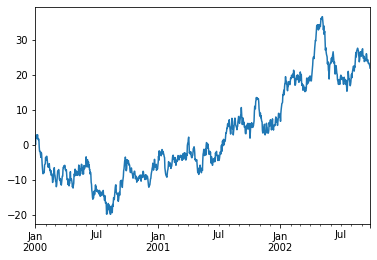

In [83]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

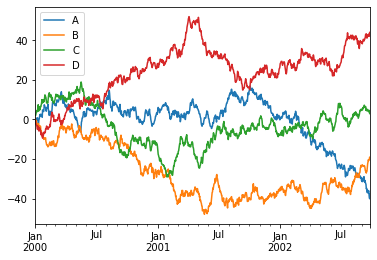

In [84]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

# 13. Importing / Exporting Data

## CSV

In [85]:
# Writing to a csv file
df.to_csv('data.csv')

In [86]:
# Reading from a csv file
pd.read_csv('data.csv', index_col=0)

,A,B,C,D
2000-01-01,-0.365322,0.827445,1.830654,-0.553503
2000-01-02,-0.196919,-1.892056,1.943279,-0.751998
2000-01-03,0.690515,-1.775956,2.539199,-2.410593
2000-01-04,-0.068574,-0.512226,3.415514,-2.721093
2000-01-05,0.179001,-1.789338,4.231880,-2.955159
...,...,...,...,...
2002-09-22,-35.982944,-20.748345,3.907117,42.908286
2002-09-23,-37.866127,-20.698611,4.583933,41.858546
2002-09-24,-39.428533,-20.017607,4.033319,43.253061
2002-09-25,-40.034387,-19.008395,2.908710,43.801258


## Excel

In [87]:
# Writing to an excel file
df.to_excel('data.xlsx', sheet_name='Sheet1')

In [88]:
# Reading from an excel file
pd.read_excel('data.xlsx', index_col=0)

,A,B,C,D
2000-01-01,-0.365322,0.827445,1.830654,-0.553503
2000-01-02,-0.196919,-1.892056,1.943279,-0.751998
2000-01-03,0.690515,-1.775956,2.539199,-2.410593
2000-01-04,-0.068574,-0.512226,3.415514,-2.721093
2000-01-05,0.179001,-1.789338,4.231880,-2.955159
...,...,...,...,...
2002-09-22,-35.982944,-20.748345,3.907117,42.908286
2002-09-23,-37.866127,-20.698611,4.583933,41.858546
2002-09-24,-39.428533,-20.017607,4.033319,43.253061
2002-09-25,-40.034387,-19.008395,2.908710,43.801258


## HDF5

In [89]:
# Writing to a HDF5 Store
df.to_hdf('data.hdf', 'df')

In [90]:
# Reading from a HDF5 Store 
pd.read_hdf('data.hdf', 'df')

,A,B,C,D
2000-01-01,-0.365322,0.827445,1.830654,-0.553503
2000-01-02,-0.196919,-1.892056,1.943279,-0.751998
2000-01-03,0.690515,-1.775956,2.539199,-2.410593
2000-01-04,-0.068574,-0.512226,3.415514,-2.721093
2000-01-05,0.179001,-1.789338,4.231880,-2.955159
...,...,...,...,...
2002-09-22,-35.982944,-20.748345,3.907117,42.908286
2002-09-23,-37.866127,-20.698611,4.583933,41.858546
2002-09-24,-39.428533,-20.017607,4.033319,43.253061
2002-09-25,-40.034387,-19.008395,2.908710,43.801258
